<a href="https://colab.research.google.com/github/Gowr93/MachineLearning_Practise/blob/main/DataPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import os
import numpy as np
import pandas as pd

# current working directory
os.getcwd()

'/content'

In [ ]:
# data Loading

dataset = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
# data Volume
dataset.shape

(915, 11)

In [ ]:
# Displaying first 5 columns from the dataset
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# We can notice duplicates are found
# Check for how many duplicate values
print('Number of duplicate rows in the data before treating:',dataset.duplicated().sum())

Number of duplicate rows in the data before treating: 24


In [ ]:
# Treating the Data duplicates

dataset.drop_duplicates(keep = 'first', inplace = True)


In [ ]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# The volume after treating the dataset with duplicatesp
dataset.shape

(891, 11)

## Missing Data Treatment


In [ ]:
#Review the structure of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# Displaying column names
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking the missing data
dataset.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
# Overall count of missing data
dataset.isnull().sum().sum()

np.int64(866)

In [ ]:
# To check the missing data columnwise in percentage
dataset.isnull().sum()/len(dataset)*100

,0
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,77.104377


In [ ]:
# its notieces its 77 % that is more than 50 % we can drop it

dataset = dataset.drop(['Cabin'], axis = 1)
# axis = 1, operation should be performed columnwise

In [ ]:
# After dropping checking for the percentage of missing data
dataset.isnull().sum()/len(dataset)*100

,0
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Embarked,0.224467


In [ ]:
# To check the datatypes of the dataset
dataset.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [ ]:
sample_column = dataset.select_dtypes(include = 'object')
print(sample_column)

                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket Embarked  
0           A/5 21171        S  
1            PC 17599        C  
2    STON/O2. 3101282        S  
3              113803        S  
4              373450        S  
..       

In [ ]:
# filling the values with mode for column Embarked since it is object
# checking the counts for Embarked column
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# filling the values with mode for column Embarked since it is object
dataset['Embarked'].mode()

,Embarked
0,S


In [ ]:
# Filling with mode
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode())

In [ ]:
# Checking missing values in the dataset
dataset.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [ ]:
# Now treating Age, Since its numeric we can go with median
dataset['Age'].median()

28.0

In [ ]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [ ]:
# Checking missing values in the dataset
dataset.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [ ]:
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
dataset['Embarked'].isnull().sum()

np.int64(2)

## Encoding concept


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [ ]:
dataset1 = dataset[['Sex','Embarked']]
dataset1.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [ ]:
# checking for the null values
dataset1.isnull().sum()

,0
Sex,0
Embarked,2


In [ ]:
# Handling Missing data by filling with mode
dataset1['Embarked'] = dataset1['Embarked'].fillna(dataset1['Embarked'].mode())

/tmp/ipython-input-2022361892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Embarked'] = dataset1['Embarked'].fillna(dataset1['Embarked'].mode())


In [ ]:
# Review the structure of dataset1
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 20.9+ KB


In [ ]:
dataset1.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [ ]:
dataset1['Sex'].value_counts()

,count
Sex,
male,577
female,314


## Categorical Features Transformation

In [ ]:
# Encoding using label Encoder Ordinal categorical variable Column Name = 'Sex'
dataset1['Sex'] = dataset1['Sex'].astype('category')
dataset1['Sex'] = dataset1['Sex'].cat.codes

/tmp/ipython-input-3237200320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Sex'] = dataset1['Sex'].astype('category')
/tmp/ipython-input-3237200320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Sex'] = dataset1['Sex'].cat.codes


In [ ]:
dataset1.head(2)

,Sex,Embarked
0,1,S
1,0,C


In [ ]:
#Label Encoder for column Embarked

dataset1['Embarked'] = dataset1['Embarked'].astype('category')
dataset1['Embarked'] = dataset1['Embarked'].cat.codes

/tmp/ipython-input-3058842362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Embarked'] = dataset1['Embarked'].astype('category')
/tmp/ipython-input-3058842362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Embarked'] = dataset1['Embarked'].cat.codes


In [ ]:
dataset1.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


## Outlier Detection Methods

In [ ]:
# importing libraries

import numpy as np

In [ ]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

UUsing Z-Score

In [ ]:
data = dataset['Fare']
mean = np.mean(data) # Calculates mean
std_dev = np.std(data) # Calculates Standard Deviaton
Z_scores = (data -mean)/std_dev # Computes Z- score
outliers = data[np.abs(Z_scores) > 3 ]
 # fnds all datapoints with greater than 3
outliers

,Fare
27,263.0000
88,263.0000
118,247.5208
258,512.3292
299,247.5208
311,262.3750
341,263.0000
377,211.5000
380,227.5250
438,263.0000


Using IQR

In [ ]:
# calculates the first Quartile
Q1 = dataset['Fare'].quantile(0.25)
# Calculates the Second Quartile
Q3 = dataset['Fare'].quantile(0.75)
# computing IQR
IQR = Q3-Q1

 # Below, we find all the data points that fall below the lower bound or above the upper bound
outliers = dataset['Fare'][
     (dataset['Fare'] < (Q1 - 1.5 * IQR)) |
     (dataset['Fare'] > Q3 + 1.5 * IQR)
 ]
print(outliers)

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


Using Standard Deviation

In [ ]:
# calculates the mean
mean = np.mean(dataset['Fare'])
#Calculates the standard deviaton
standard_deviation = np.std(dataset['Fare'])
# finds all the datapoints that are 3 Std dev away from the mean
outliers = dataset['Fare'][np.abs(dataset['Fare'] - mean) > 3 * standard_deviation]
outliers

,Fare
27,263.0000
88,263.0000
118,247.5208
258,512.3292
299,247.5208
311,262.3750
341,263.0000
377,211.5000
380,227.5250
438,263.0000


### Outlier detection in Titanic Dataset


<Axes: >

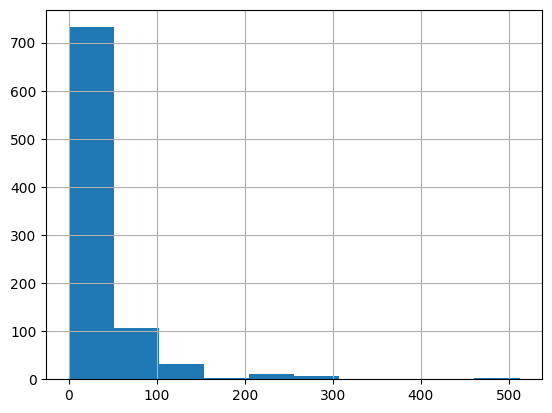

In [ ]:
# Data Visualiation technique to identify the outliers
# from descriptive statistics we can identify dataset['Fare'] may have outliers


 # importting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Using histogram
dataset['Fare'].hist()

# its left skewed, outlier is present

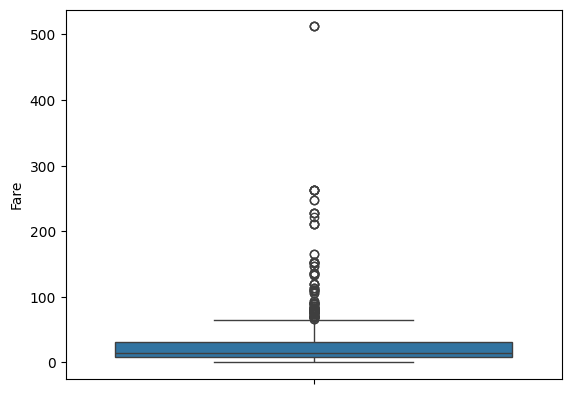

In [ ]:
# Using boxplot

sns.boxplot(y = 'Fare',data = dataset)
plt.show()

<Axes: >

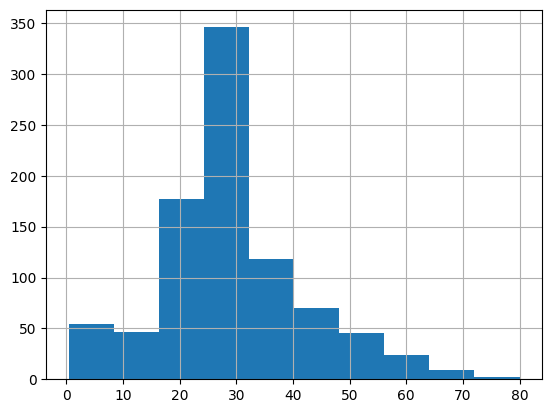

In [ ]:
# from descriptive statistics we can identify dataset['Age'] may have outliers

# Using Histogram

dataset['Age'].hist()
# its also skewed leftside

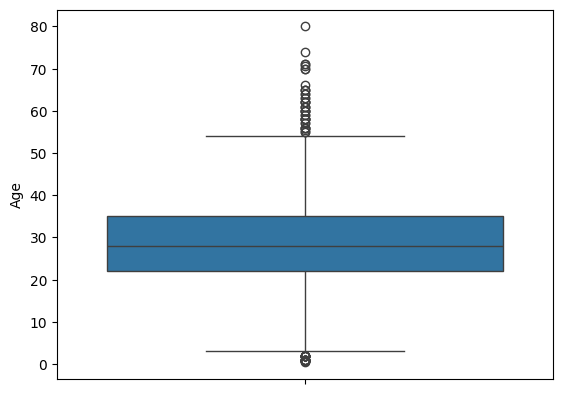

In [ ]:
# using boxplot

sns.boxplot(y = 'Age', data = dataset)
plt.show()

In [ ]:
# Outlier detection - 'Age'

# Calculate mean
mean_age = np.mean(dataset['Age'])
# Calculates Standard deviation
std_dev_age = np.std(dataset['Age'])
# calculates z_score
Z_Scores_age = (dataset['Age'] - mean_age) / std_dev_age
# finds all the datapoints that are 3 standard deviation away from the mean
outlier_age = dataset['Age'][np.abs(Z_Scores_age)> 3]
print("\n Outliers in Age using Z-score\n", outlier_age)






 Outliers in Age using Z-score
 96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [ ]:
# outlier detection for the column 'Fare'

# calculate mean
mean_fare = np.mean(dataset['Fare'])

# calculate the standard deviation
std_dev_fare = np.std(dataset['Fare'])

# calculate the z scores
z_scores_fare = (dataset['Fare'] - mean_fare)/std_dev_fare

# finds all the datapoints that are 3 standard deviation away from the mean
oultiers_far = dataset['Fare'][np.abs(z_scores_fare > 3)]

print("\n Outliers in 'Fare' using Z-Score: \n",oultiers_far )


 Outliers in 'Fare' using Z-Score: 
 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## Now we have to handle it by using capping methods


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
# Calculate the upper bound for 'Age'
# why we have selected upper bound because its above the range boxplot

q1 = dataset['Age'].quantile(0.25)
q3 = dataset['Age'].quantile(0.75)
iqr = q3-q1

upper_bound = q3 + 1.5 * iqr

# capping using upper_bound for Age
dataset['Age'] = np.where(dataset['Age']> upper_bound, upper_bound, dataset['Age'])

# capping using upper_bound for Fare

dataset['Fare'] = np.where(dataset['Fare'] > upper_bound, upper_bound, dataset['Fare'])


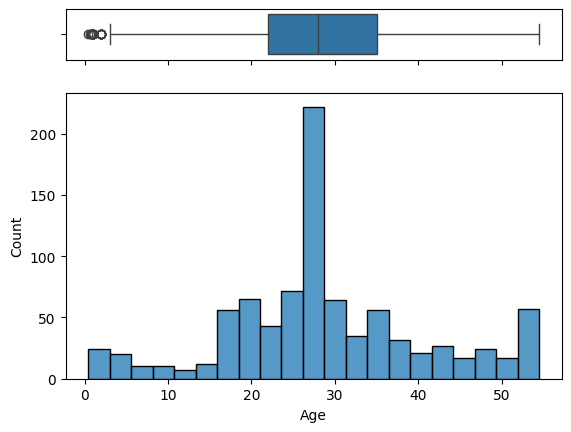

'"# For Sine Function\naxis[0, 0].plot(X, Y1)\naxis[0, 0].set_title("Sine Function")\n\n# For Cosine Function\naxis[0, 1].plot(X, Y2)\naxis[0, 1].set_title("Cosine Function")\n'

In [ ]:
# Checking for outliers after Outlier treatment

# For 'Age' column
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax

sns.boxplot(dataset['Age'], orient="h", ax=ax_box)
sns.histplot(data=dataset, x="Age", ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()


""""# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")

# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")
"""

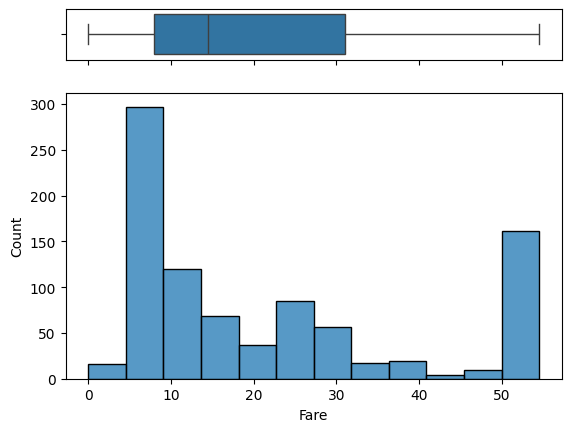

In [ ]:
# For 'Fare' column
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax

sns.boxplot(dataset['Fare'], orient="h", ax=ax_box)
sns.histplot(data=dataset, x="Fare", ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()


## Numerical Transformation


In [ ]:
# applying MinMaxScaler to scales the numerical features within a specified range (0-1)
# to reduce high variations and standaridizing the data

from sklearn.preprocessing import MinMaxScaler

# Converting dataframe into an array for the scaler

dataset[['Age','Fare']] = MinMaxScaler().fit_transform(dataset[['Age','Fare']])

print("\n Numerical feature scaling :\n", dataset[['Age','Fare']].head())


 Numerical feature scaling :
         Age      Fare
0  0.399038  0.133028
1  0.694896  1.000000
2  0.473003  0.145413
3  0.639423  0.974312
4  0.639423  0.147706


## Normalisation

In [ ]:
## Before Normalization 'Age' Column
print(dataset['Age'])

0      0.399038
1      0.694896
2      0.473003
3      0.639423
4      0.639423
         ...   
886    0.491494
887    0.343565
888    0.509985
889    0.473003
890    0.583950
Name: Age, Length: 891, dtype: float64


In [ ]:
# After Normalization 'Age' Column

dataset['Age']= (dataset['Age'] - dataset['Age'].min())/ (dataset['Age'].max() - dataset['Age'].min())
print(dataset['Age'])

0      0.399038
1      0.694896
2      0.473003
3      0.639423
4      0.639423
         ...   
886    0.491494
887    0.343565
888    0.509985
889    0.473003
890    0.583950
Name: Age, Length: 891, dtype: float64


## Standardization

In [ ]:
# Before Standardization
dataset['Fare'].head()

,Fare
0,0.133028
1,1.000000
2,0.145413
3,0.974312
4,0.147706


In [ ]:
# After Standardization
dataset['Fare'] = (dataset['Age'] - dataset['Age'].mean())/ dataset['Fare'].std()

print(dataset['Fare'])


0     -0.403954
1      0.518309
2     -0.173388
3      0.345385
4      0.345385
         ...   
886   -0.115747
887   -0.576879
888   -0.058105
889   -0.173388
890    0.172461
Name: Fare, Length: 891, dtype: float64
